# Default of credit card clients


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import scipy
import seaborn as sns
import math
import sklearn
import scipy

from scipy.io import arff
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,make_scorer,ConfusionMatrixDisplay,recall_score ,classification_report,accuracy_score,f1_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


# change the trees

## Loading Data

In [2]:
# data = pd.read_excel('Classification_Datasets/credit_card_clients/credit_card_clients.xls',header=1)
data = pd.read_excel('Classification_Datasets/2_Credit_Card_Clients/credit_card_clients.xls',header=1)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Data preparation and Analysis

In [3]:
print(np.count_nonzero(data=="?"))
print(np.count_nonzero(data==np.nan))
data.isnull().sum()

0
0


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [4]:
data.shape

(30000, 25)

In [5]:
#dataset = dataset.drop(axis=1, columns="Unnamed: 0")
#dataset.reset_index()

dataset= data.iloc[:,1:] 
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
dataset.shape

(30000, 24)

In [7]:
frequency = dataset['default payment next month'].value_counts()
print(frequency)
print("-------")

0    23364
1     6636
Name: default payment next month, dtype: int64
-------


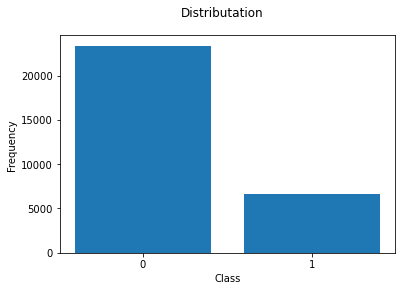

<AxesSubplot:xlabel='default payment next month', ylabel='count'>

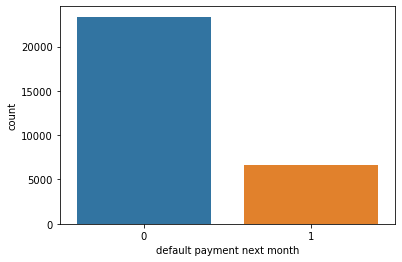

In [8]:
plt.plot()
plt.ylabel('Frequency')
plt.xlabel('Class')
plt.bar( ("0","1"), frequency)
plt.suptitle("Distributation")
plt.show()
sns.countplot(x="default payment next month", data= data)

In [9]:
print(data.columns)
print(data.shape)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')
(30000, 25)


In [10]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

array([[<AxesSubplot:xlabel='LIMIT_BAL', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='SEX', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='EDUCATION', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='MARRIAGE', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='AGE', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='PAY_0', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='PAY_2', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='PAY_3', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='PAY_4', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='PAY_5', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='PAY_6', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='BILL_AMT1', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='BILL_AMT2', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='BILL_AMT3', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='BILL_AMT4', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='BILL_AMT5', ylabel='LIMIT_BAL'>,
        <AxesSubplot:xlabel='BILL_AMT6', ylab

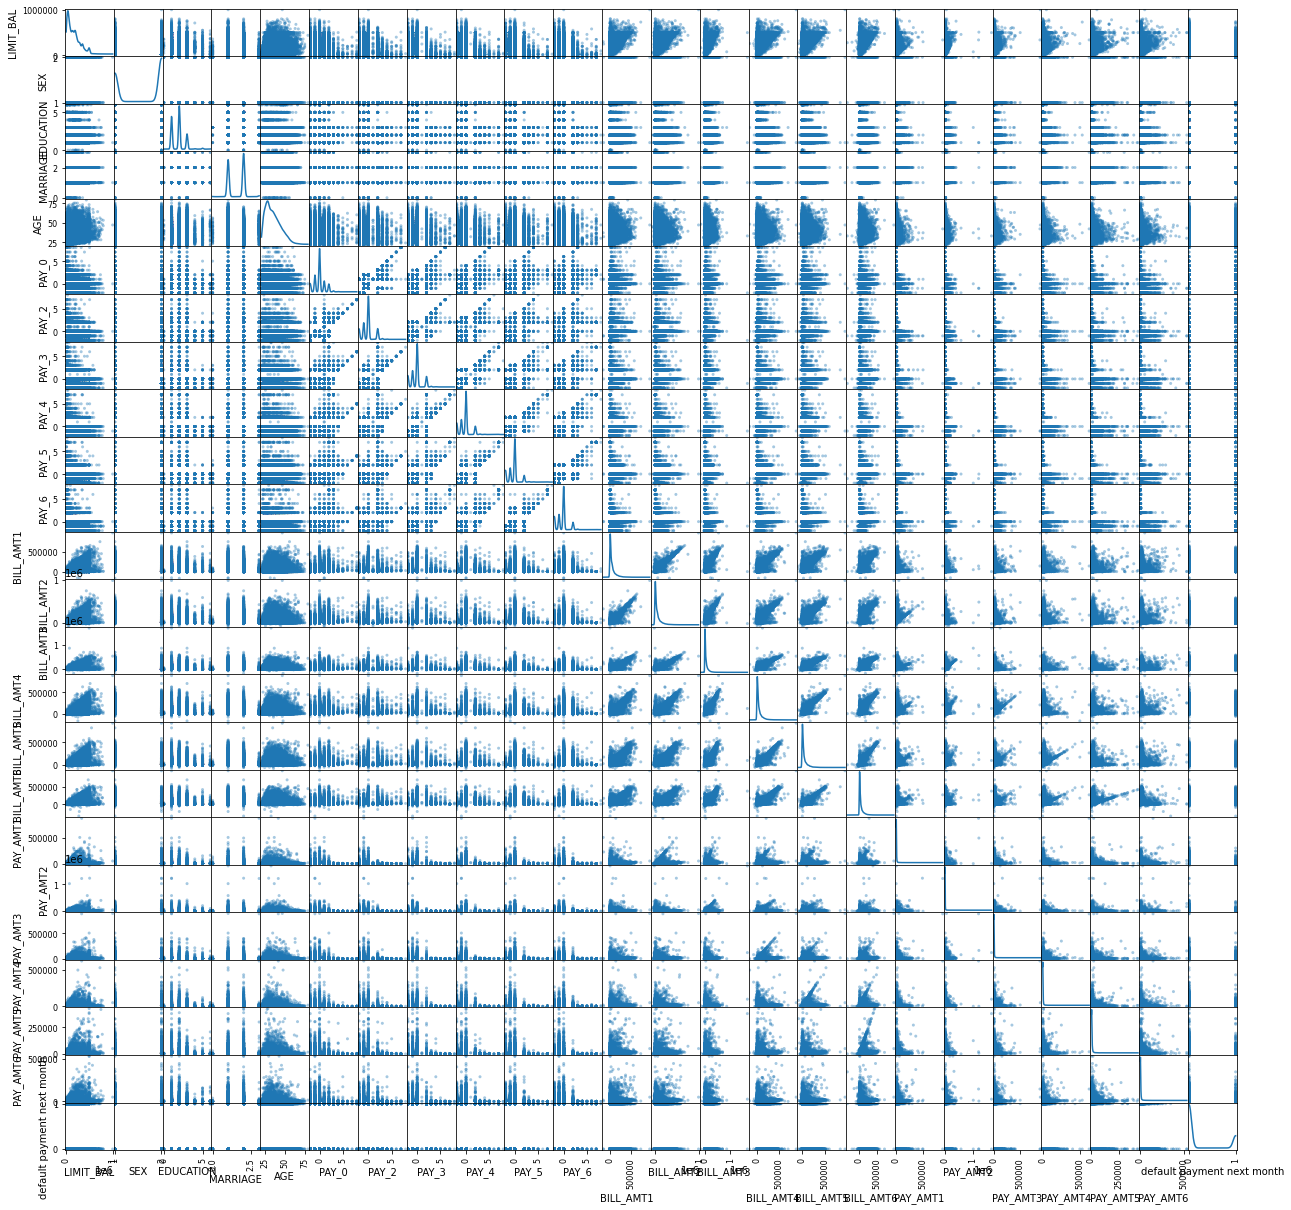

In [12]:
pd.plotting.scatter_matrix(dataset.astype(int),figsize=(21,21),diagonal= "kde", alpha=0.4)


In [13]:
print(dataset.columns)
print(dataset.shape)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')
(30000, 24)


<AxesSubplot:>

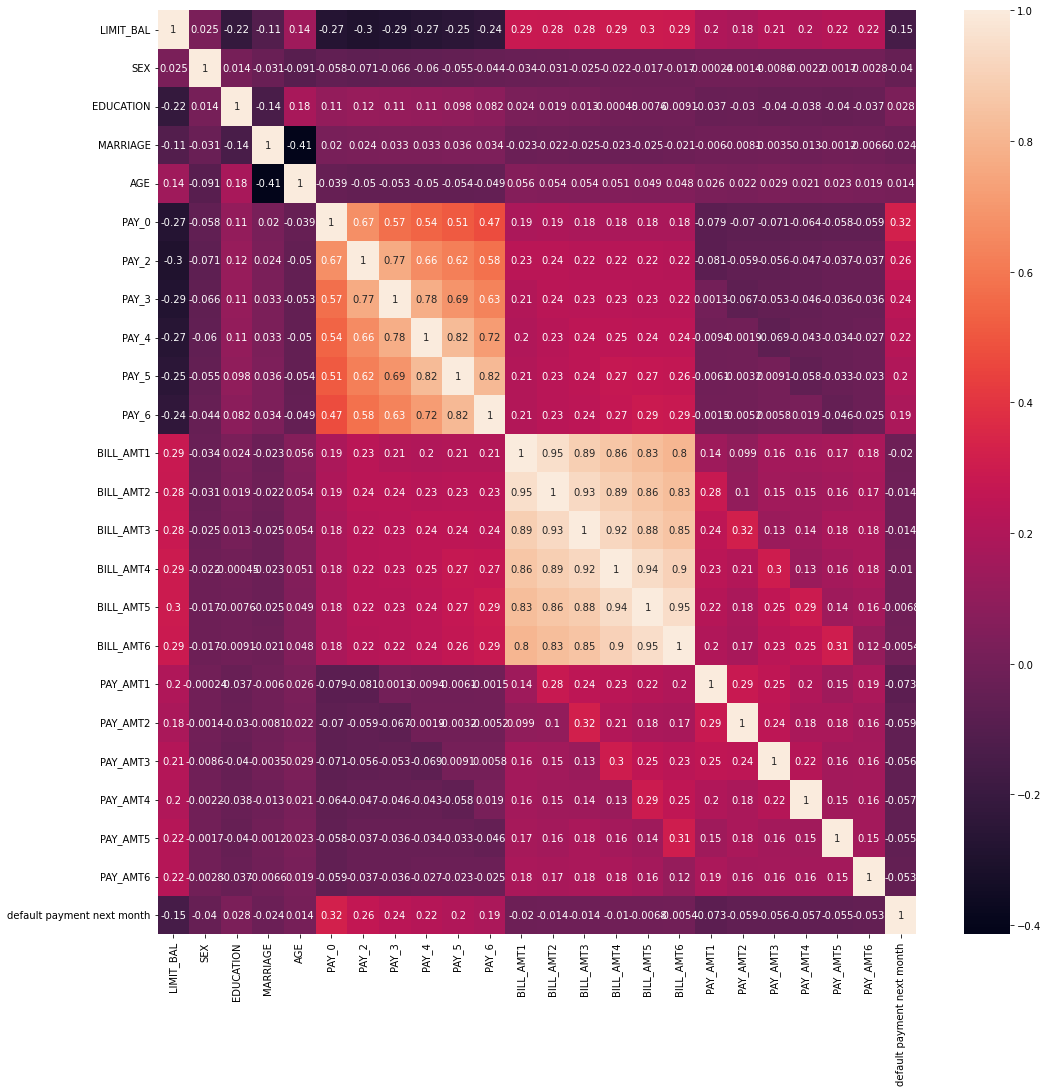

In [14]:
plt.figure(figsize=(17,17))
sns.heatmap(dataset.corr(), annot =True)

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      3529
           1       0.73      0.33      0.46       971

    accuracy                           0.83      4500
   macro avg       0.79      0.65      0.68      4500
weighted avg       0.82      0.83      0.80      4500

PAY_0


<AxesSubplot:xlabel='PAY_0', ylabel='count'>

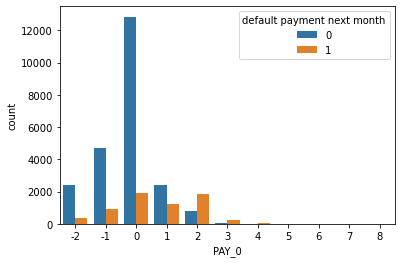

In [15]:
XX = dataset.iloc[:,:-1]
yy = dataset["default payment next month"]
X_trn, X_tst, y_trn, y_tst = train_test_split(XX.astype(int), yy.astype(int), test_size=0.15, random_state=0)

impo = AdaBoostClassifier(n_estimators=1).fit(X_trn,y_trn)
pred = impo.predict(X_tst)
print(classification_report(y_tst,pred))
print (XX.columns[impo.feature_importances_.argmax()])
sns.countplot(data=dataset, x="PAY_0",hue="default payment next month")

### Defining Dictionary of Models

In [16]:
MODELS = {'logistic_r', 'svc', 'tree', 'forest', 'knn', 'adaboost', 'gnb', 'nn'}
credit_card_clients = {}     

## Create train and test set


In [17]:
x = dataset.iloc[:,:-1]
y = dataset["default payment next month"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0)



In [19]:
np.bincount(y_train)

array([18661,  5339], dtype=int64)

In [20]:
StScale = StandardScaler()
StScale.fit(X_train)
X_train = StScale.transform(X_train)

X_test = StScale.transform(X_test)

In [21]:
from tabulate import tabulate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def model_results(model):
    table = [["Parameters / Metrics", "Tuned"]]
    curr_model = model['model']
    

    if model['hyperparameters'] == 1:
        for param in curr_model.best_params_:
            table.append([param, curr_model.best_params_[param]])

    prediction = curr_model.predict(X_test)
    print(classification_report(y_test, prediction))
    print(confusion_matrix (y_test, prediction))
    ConfusionMatrixDisplay.from_predictions(y_test, prediction);
    mse = mean_squared_error(y_test, prediction)
    accuracy = accuracy_score(y_test, prediction)
    weighted_f1 = f1_score(y_test, prediction, average='weighted')
    macro_f1 = f1_score(y_test, prediction, average='macro')
    W_recall = recall_score(y_test, prediction,average='weighted')
    type1_recall = recall_score(y_test, prediction,pos_label=1,average='binary')
    
    table.append(['Accuracy',accuracy])
    table.append(['weighted_f1', weighted_f1])
    table.append(['macro_f1',macro_f1])
    table.append(['weighted_Recall',W_recall])
    table.append(['class1_Recall',type1_recall])

    
    prediction_trn = curr_model.predict(X_train)
    accuracy_trn = accuracy_score(y_train, prediction_trn)
    weighted_f1_trn = f1_score(y_train, prediction_trn, average='weighted')
    macro_f1_trn = f1_score(y_train, prediction_trn, average='macro')
    W_recall_trn = recall_score(y_train, prediction_trn,average='weighted')
    type1_recall_trn = recall_score(y_train, prediction_trn,pos_label=1,average='binary')
    
    table.append(['Accuracy (tarin)',accuracy_trn])
    table.append(['weighted_f1 (tarin)', weighted_f1_trn])
    table.append(['macro_f1 (tarin)',macro_f1_trn])
    table.append(['weighted_Recall (tarin)',W_recall_trn])
    table.append(['class1_Recall (tarin)',type1_recall_trn])
    
    print(tabulate(table, headers='firstrow', tablefmt='grid'))

    return prediction

## 1. LogisticRegression for Classification

In [22]:
logistic_r = LogisticRegression(class_weight='balanced',random_state=0)
logistic_r.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0)

## LogisticRegression Analysis

              precision    recall  f1-score   support

           0       0.88      0.70      0.78      4703
           1       0.37      0.64      0.47      1297

    accuracy                           0.69      6000
   macro avg       0.63      0.67      0.63      6000
weighted avg       0.77      0.69      0.71      6000

[[3311 1392]
 [ 466  831]]
+-------------------------+----------+
| Parameters / Metrics    |    Tuned |
+=========================+==========+
| Accuracy                | 0.690333 |
+-------------------------+----------+
| weighted_f1             | 0.714158 |
+-------------------------+----------+
| macro_f1                | 0.626528 |
+-------------------------+----------+
| weighted_Recall         | 0.690333 |
+-------------------------+----------+
| class1_Recall           | 0.640709 |
+-------------------------+----------+
| Accuracy (tarin)        | 0.689458 |
+-------------------------+----------+
| weighted_f1 (tarin)     | 0.712131 |
+---------------------

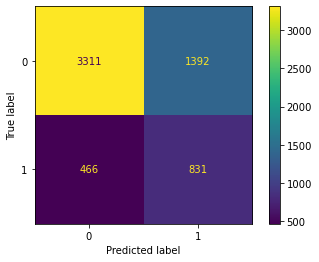

In [23]:
credit_card_clients['logistic_r'] = {'model':logistic_r, 'hyperparameters':0}
lr_prediction = model_results(credit_card_clients['logistic_r'])

## 2. Support vector classification

In [24]:
svc = SVC(class_weight ='balanced').fit(X_train, y_train)

In [25]:
parameters = {
    'C':[0.1,0.01, 0.001, 0.5,0.7,1,10,50, 100,150,170,180,190, 200,220, 250,300,1000],
    'gamma': ['scale','auto',0.1, 0.01,0.02, 0.05, 0.03, 0.07, 0.001, 0.009, 0.008],
}
svc_model = RandomizedSearchCV(svc, parameters, verbose=10, random_state=0).fit(X_train, y_train)
svc_model.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 1/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.787 total time=  37.7s
[CV 2/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 2/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.779 total time=  42.2s
[CV 3/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 3/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.776 total time=  39.6s
[CV 4/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 4/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.759 total time=  41.2s
[CV 5/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 5/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.785 total time=  38.6s
[CV 1/5; 2/10] START C=250, gamma=0.01..........................................
[CV 1/5; 2/10] END ...........C=250, gamma=0.01;

{'gamma': 'auto', 'C': 0.01}

In [26]:
svc_model.best_estimator_

SVC(C=0.01, class_weight='balanced', gamma='auto')

## Support vector classification Analysis

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4703
           1       0.51      0.53      0.52      1297

    accuracy                           0.79      6000
   macro avg       0.69      0.70      0.69      6000
weighted avg       0.79      0.79      0.79      6000

[[4026  677]
 [ 604  693]]
+-------------------------+--------------------+
| Parameters / Metrics    | Tuned              |
+=========================+====================+
| gamma                   | auto               |
+-------------------------+--------------------+
| C                       | 0.01               |
+-------------------------+--------------------+
| Accuracy                | 0.7865             |
+-------------------------+--------------------+
| weighted_f1             | 0.7885869486902372 |
+-------------------------+--------------------+
| macro_f1                | 0.6912150687046472 |
+-------------------------+--------------------+
| weighte

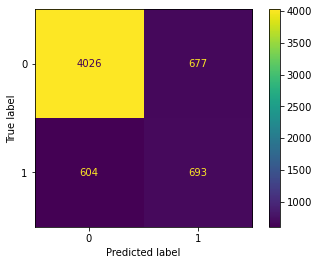

In [27]:
credit_card_clients['svc'] = {'model':svc_model, 'hyperparameters':1}
svc_prediction = model_results(credit_card_clients['svc'])

## Decision tree

In [28]:
tree = DecisionTreeClassifier(class_weight ='balanced').fit(X_train, y_train)

In [29]:
parameters = {
    'max_depth': scipy.stats.uniform(1, 100),
    'min_samples_split': scipy.stats.uniform(0, 1) 
}
tree_model = RandomizedSearchCV(tree, parameters, verbose=1, n_iter=20, random_state=0).fit(X_train, y_train)
tree_model.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'max_depth': 55.88135039273247, 'min_samples_split': 0.7151893663724195}

## Decision tree Analysis

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4703
           1       0.50      0.52      0.51      1297

    accuracy                           0.78      6000
   macro avg       0.68      0.69      0.69      6000
weighted avg       0.79      0.78      0.78      6000

[[4024  679]
 [ 622  675]]
+-------------------------+-----------+
| Parameters / Metrics    |     Tuned |
+=========================+===========+
| max_depth               | 55.8814   |
+-------------------------+-----------+
| min_samples_split       |  0.715189 |
+-------------------------+-----------+
| Accuracy                |  0.783167 |
+-------------------------+-----------+
| weighted_f1             |  0.784837 |
+-------------------------+-----------+
| macro_f1                |  0.685041 |
+-------------------------+-----------+
| weighted_Recall         |  0.783167 |
+-------------------------+-----------+
| class1_Recall           |  0.520432 |
+-----

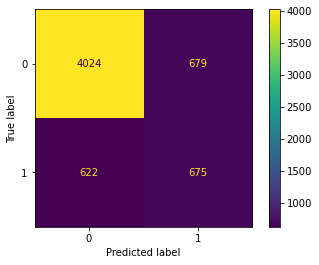

In [30]:
credit_card_clients['tree'] = {'model':tree_model, 'hyperparameters':1}
tree_prediction = model_results(credit_card_clients['tree'])

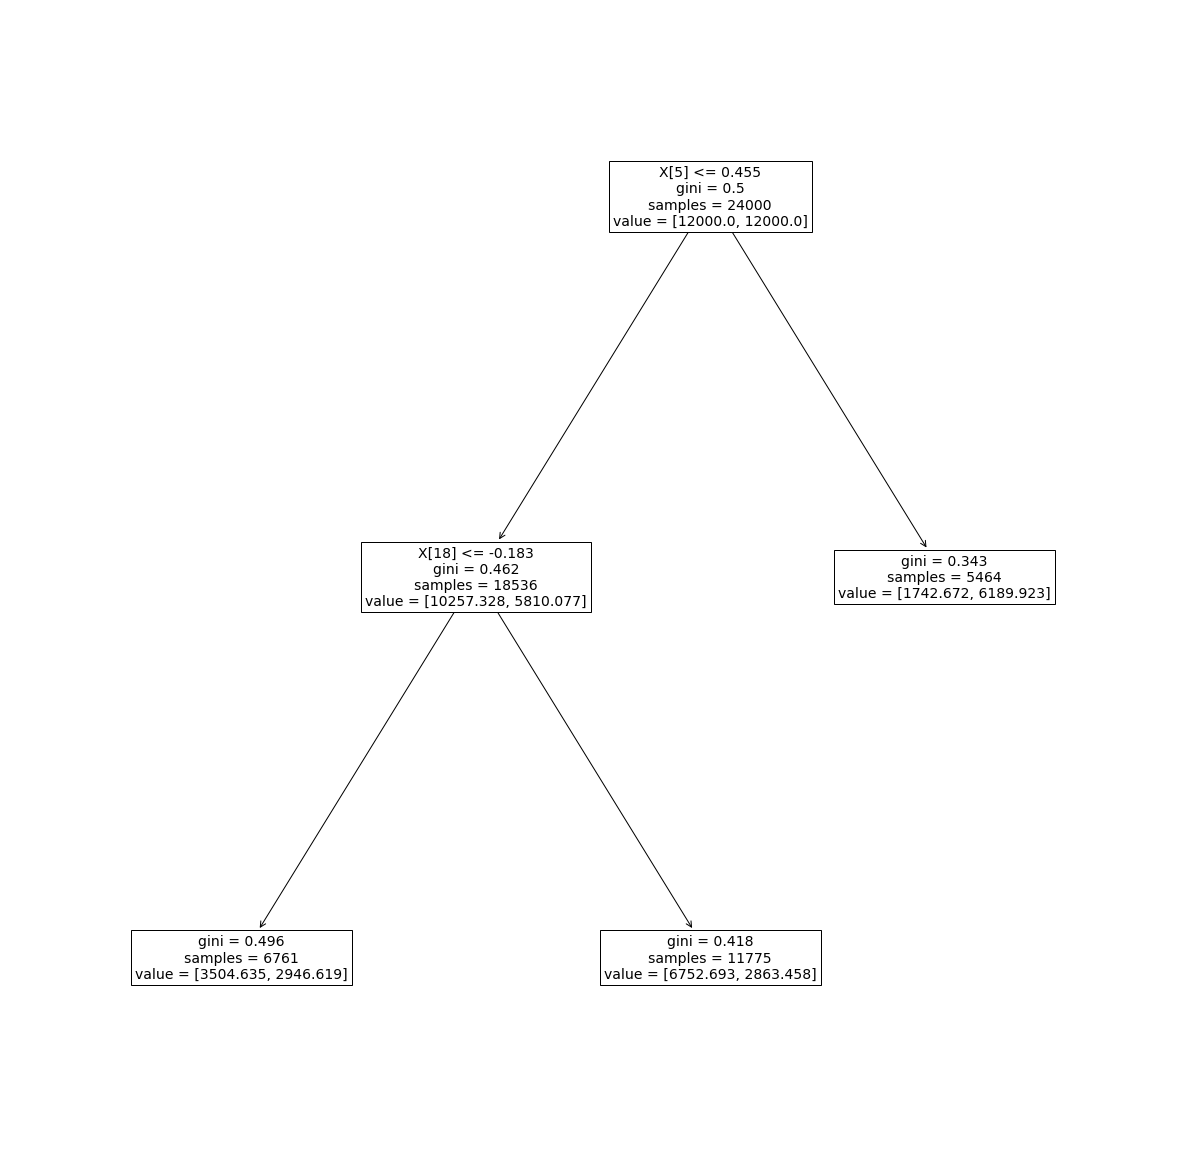

In [31]:
plt.figure(figsize=(21,21))
plot_tree(tree_model.best_estimator_, max_depth = 2, fontsize=14);

## Random Forest

In [32]:
forest = RandomForestClassifier(class_weight='balanced')
forest = forest.fit(X_train, y_train)

In [33]:
parameters = {
    'n_estimators': range(1,200),
    'max_depth': scipy.stats.uniform(1, 150),
    "criterion": ["gini", "entropy"]
}
forest_model = RandomizedSearchCV(forest, parameters,n_jobs=4,cv=3, verbose=1,n_jobs =4, n_iter=20, random_state=0).fit(X_train, y_train)
forest_model.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


{'criterion': 'entropy', 'max_depth': 129.6918426434135, 'n_estimators': 104}

### Random Forest Analysis

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4703
           1       0.67      0.36      0.47      1297

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.81      0.82      0.80      6000

[[4471  232]
 [ 830  467]]
+-------------------------+--------------------+
| Parameters / Metrics    | Tuned              |
+=========================+====================+
| criterion               | entropy            |
+-------------------------+--------------------+
| max_depth               | 129.6918426434135  |
+-------------------------+--------------------+
| n_estimators            | 104                |
+-------------------------+--------------------+
| Accuracy                | 0.823              |
+-------------------------+--------------------+
| weighted_f1             | 0.8017756548683131 |
+-------------------------+--------------------+
| macro_f

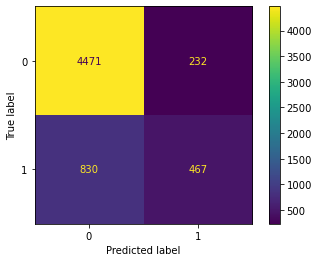

In [34]:
credit_card_clients['forest'] = {'model':forest_model, 'hyperparameters':1}
tree_prediction = model_results(credit_card_clients['forest'])

## 5. K-nearest neighbours


Fitting and hyperparameter search

In [35]:
from sklearn import neighbors
import sklearn
import scipy

knn = sklearn.neighbors.KNeighborsClassifier(n_jobs=-1)

In [36]:
param_distribution = {'n_neighbors': range(1, 150), 'weights':['uniform', 'distance'], 'leaf_size': scipy.stats.uniform(1, 50)}
knn_randomized = sklearn.model_selection.RandomizedSearchCV(knn, param_distribution, verbose=1, random_state=0,n_jobs =4, cv=3, n_iter=25).fit(X_train, y_train)

print('best Hyperparameters = ' + str(knn_randomized.best_params_))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
best Hyperparameters = {'leaf_size': 41.045537598982214, 'n_neighbors': 30, 'weights': 'distance'}


              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4703
           1       0.63      0.31      0.42      1297

    accuracy                           0.81      6000
   macro avg       0.73      0.63      0.65      6000
weighted avg       0.79      0.81      0.79      6000

[[4467  236]
 [ 890  407]]
+-------------------------+--------------------+
| Parameters / Metrics    | Tuned              |
+=========================+====================+
| leaf_size               | 41.045537598982214 |
+-------------------------+--------------------+
| n_neighbors             | 30                 |
+-------------------------+--------------------+
| weights                 | distance           |
+-------------------------+--------------------+
| Accuracy                | 0.8123333333333334 |
+-------------------------+--------------------+
| weighted_f1             | 0.7868009585101077 |
+-------------------------+--------------------+
| macro_f

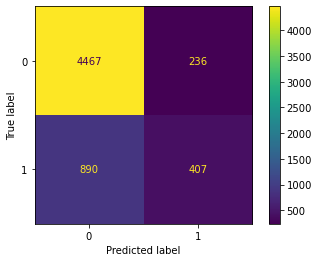

In [37]:
credit_card_clients["knn"] = {"model":knn_randomized, "hyperparameters":1}
knn_prediction = model_results(credit_card_clients['knn'])

## 6. AdaBoost Classification

Fitting and Hyperparameter search 

In [38]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier().fit(X_train,y_train)

In [39]:
param_distribution = {'n_estimators': range(1, 250), 'learning_rate': scipy.stats.uniform(.1, 5)}
adaBoost_randomized = sklearn.model_selection.RandomizedSearchCV(adaBoost, param_distribution,n_jobs =4, verbose=1, random_state=0, cv=5, n_iter=50).fit(X_train, y_train)

print('Best Hyperparameters = ' + str(adaBoost_randomized.best_params_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters = {'learning_rate': 3.329470565333281, 'n_estimators': 37}


              precision    recall  f1-score   support

           0       0.84      0.97      0.90      4703
           1       0.73      0.34      0.46      1297

    accuracy                           0.83      6000
   macro avg       0.78      0.65      0.68      6000
weighted avg       0.82      0.83      0.80      6000

[[4539  164]
 [ 859  438]]
+-------------------------+-----------+
| Parameters / Metrics    |     Tuned |
+=========================+===========+
| learning_rate           |  3.32947  |
+-------------------------+-----------+
| n_estimators            | 37        |
+-------------------------+-----------+
| Accuracy                |  0.8295   |
+-------------------------+-----------+
| weighted_f1             |  0.804166 |
+-------------------------+-----------+
| macro_f1                |  0.680009 |
+-------------------------+-----------+
| weighted_Recall         |  0.8295   |
+-------------------------+-----------+
| class1_Recall           |  0.337702 |
+-----

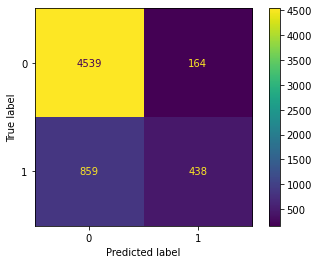

In [40]:
credit_card_clients["adaboost"] = {"model":adaBoost_randomized, "hyperparameters":1}
adaboost_prediction = model_results(credit_card_clients['adaboost'])

## 7. Gaussian Naive Bayes classification

In [41]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB().fit(X_train, y_train)

In [42]:
# param_distribution = {'n_estimators': range(1, 150), 'learning_rate': scipy.stats.reciprocal(1, 5)}
# adaBoost_randomized = sklearn.model_selection.RandomizedSearchCV(adaBoost, param_distribution, verbose=1, random_state=0, cv=3, n_iter=250).fit(X_train, y_train)
# print('Best Hyperparameters = ' + str(knn_randomized.best_params_))

              precision    recall  f1-score   support

           0       0.89      0.69      0.77      4703
           1       0.38      0.68      0.48      1297

    accuracy                           0.69      6000
   macro avg       0.63      0.68      0.63      6000
weighted avg       0.78      0.69      0.71      6000

[[3238 1465]
 [ 417  880]]
+-------------------------+----------+
| Parameters / Metrics    |    Tuned |
+=========================+==========+
| Accuracy                | 0.686333 |
+-------------------------+----------+
| weighted_f1             | 0.711798 |
+-------------------------+----------+
| macro_f1                | 0.629039 |
+-------------------------+----------+
| weighted_Recall         | 0.686333 |
+-------------------------+----------+
| class1_Recall           | 0.678489 |
+-------------------------+----------+
| Accuracy (tarin)        | 0.687917 |
+-------------------------+----------+
| weighted_f1 (tarin)     | 0.711871 |
+---------------------

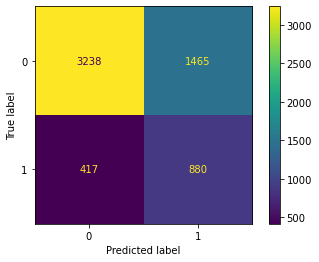

In [43]:
credit_card_clients["gnb"] = {"model":naive_bayes, "hyperparameters":0}
naive_bayes_prediction = model_results(credit_card_clients['gnb'])

## 8. Neural Network classification

In [44]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=900)

In [ ]:
param_distribution = {'max_iter': range(1000, 1500),
                        'alpha': scipy.stats.reciprocal(0.00001, 0.1), 
                        'learning_rate':['constant', 'invscaling', 'adaptive']}

mlp_randomized = sklearn.model_selection.RandomizedSearchCV(mlp, param_distribution, verbose=1, random_state=0, cv=3,n_jobs=4, n_iter=25).fit(X_train, y_train)
print('Best Hyperparameters = ' + str(knn_randomized.best_params_))

Fitting 3 folds for each of 25 candidates, totalling 75 fits


In [ ]:
credit_card_clients["nn"] = {"model":mlp_randomized, "hyperparameters":1}
nn_prediction = model_results(credit_card_clients['nn'])

### Credit_Card_Clients Analysis

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,make_scorer,ConfusionMatrixDisplay,recall_score ,classification_report,accuracy_score,f1_score


def cross_checking_model_results(dictionary):
    table = [["model", "acc", "w.f1", 'w.rec', 'clas.rec',
              'tr.acc','tr.w.f1', 'tr.w.rec', 'tr.clas.rec']]
    x_models = []
    y_accuracy = []
    y_wf1 = []
    w_recall = []
    m_recall = []
    
    trny_accuracy = []
    trny_wf1 = []
    trnw_recall = []
    trnm_recall = []

    for model_key in MODELS:
        model = dictionary[model_key]['model']
        
        prediction = model.predict(X_test)
        accuracy = accuracy_score(y_test, prediction)
        weighted_f1 = f1_score(y_test, prediction, average='weighted')
        W_recall = recall_score(y_test, prediction,average='weighted')
        malignant_recall = recall_score(y_test, prediction,pos_label=4,average='binary')
        
        prediction_trn = model.predict(X_train)
        accuracy_trn = accuracy_score(y_train, prediction_trn)
        weighted_f1_trn = f1_score(y_train, prediction_trn, average='weighted')
        W_recall_trn = recall_score(y_train, prediction_trn,average='weighted')
        malignant_recall_trn = recall_score(y_train, prediction_trn,pos_label=4,average='binary')
        table.append([model_key, accuracy, weighted_f1, W_recall,malignant_recall,
                     accuracy_trn, weighted_f1_trn, W_recall_trn,malignant_recall_trn])
        
        x_models.append(model_key)
        y_accuracy.append(accuracy)
        y_wf1.append(weighted_f1)
        w_recall.append(W_recall)
        m_recall.append(malignant_recall)
        
        trny_accuracy.append(accuracy_trn)
        trny_wf1.append(weighted_f1_trn)
        trnw_recall.append(W_recall_trn)
        trnm_recall.append(malignant_recall_trn)
    print(tabulate(table, headers='firstrow', tablefmt='grid'))
    
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(7,4))
    ax1 = sns.barplot(x=x_models, y=y_accuracy, palette="viridis")
    ax1.set_title('Models and Accuracy')
    ax1.set_xticklabels(labels=x_models, rotation=90)
    plt.figure(figsize=(7,4))
    ax2 = sns.barplot(x=x_models, y=y_wf1, palette="viridis")
    ax2.set_title('Models and weighted f1')
    ax2.set_xticklabels(labels=x_models, rotation=90)
    
    plt.figure(figsize=(7,4))
    ax2 = sns.barplot(x=x_models, y=w_recall, palette="viridis")
    ax2.set_title('Models and w_recall')
    ax2.set_xticklabels(labels=x_models, rotation=90)
    plt.figure(figsize=(7,4))
    ax2 = sns.barplot(x=x_models, y=m_recall, palette="viridis")
    ax2.set_title('Models and malignant_recall')
    ax2.set_xticklabels(labels=x_models, rotation=90)


cross_checking_model_results(breast_cancer_wisconsin_dict)